Poynomial Regression

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv('Housing data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [7]:
data['Area'] = data['sqft_living'] * data['sqft_lot']

In [8]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'Area'],
      dtype='object')

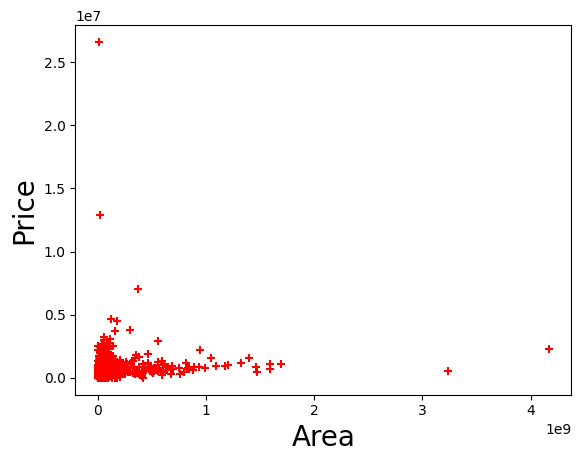

In [9]:
%matplotlib inline
plt.xlabel('Area',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.scatter(data.Area,data.price,color='red',marker='+')

In [10]:
X = data[['Area']]
y = data['price']

In [11]:
print(X)

          Area
0     10602080
1     33032500
2     23057710
3     16060000
4     20370000
...        ...
4595   9603600
4596  11056580
4597  21112140
4598  13856700
4599  12071980

[4600 rows x 1 columns]


In [12]:
print(y)

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


In [13]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)

PolynomialFeatures()

In [15]:
lr1 = LinearRegression()
lr1.fit(X_poly,y)
print(X_poly)

[[1.00000000e+00 1.06020800e+07 1.12404100e+14]
 [1.00000000e+00 3.30325000e+07 1.09114606e+15]
 [1.00000000e+00 2.30577100e+07 5.31657990e+14]
 ...
 [1.00000000e+00 2.11121400e+07 4.45722455e+14]
 [1.00000000e+00 1.38567000e+07 1.92008135e+14]
 [1.00000000e+00 1.20719800e+07 1.45732701e+14]]


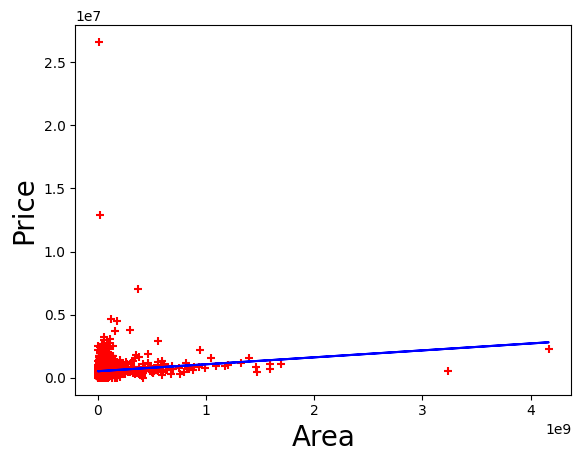

In [16]:
%matplotlib inline
plt.xlabel('Area',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.scatter(data.Area,data.price,color='red',marker='+')
plt.plot(X,lr.predict(X),color='blue')

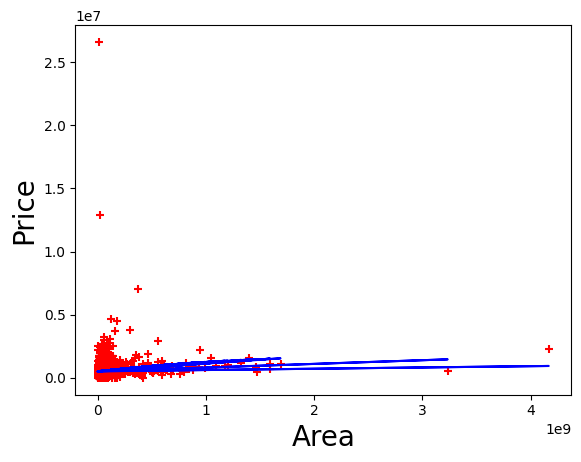

In [17]:
%matplotlib inline
plt.xlabel('Area',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.scatter(data.Area,data.price,color='red',marker='+')
plt.plot(X,lr1.predict(X_poly),color='blue')

Ridge and Lasso

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [19]:
data = pd.read_csv('/content/drive/MyDrive/Sem 3/Machine Learning/Melbourne_housing_FULL.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Sem 3/Machine Learning/Melbourne_housing_FULL.csv'

In [ ]:
data.nunique()

,0
Suburb,351
Address,34009
Rooms,12
Type,3
Price,2871
Method,9
SellerG,388
Date,78
Distance,215
Postcode,211


In [ ]:
col_to_use = ['Suburb','Rooms','Type','Method','SellerG','Regionname',
              'Propertycount','Distance','CouncilArea','Bedroom2',
              'Bathroom','Car','Landsize','BuildingArea','Price']
data = data[col_to_use]
data.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [ ]:
data.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,3
Distance,1
CouncilArea,3
Bedroom2,8217


In [ ]:
cols_to_fill_zero = ['Propertycount','Distance','Bedroom2','Bathroom','Car',
                     'CouncilArea','Regionname']
data[cols_to_fill_zero] = data[cols_to_fill_zero].fillna(0)
data.isna().sum

<bound method DataFrame.sum of        Suburb  Rooms   Type  Method  SellerG  Regionname  Propertycount  \
0       False  False  False   False    False       False          False   
1       False  False  False   False    False       False          False   
2       False  False  False   False    False       False          False   
3       False  False  False   False    False       False          False   
4       False  False  False   False    False       False          False   
...       ...    ...    ...     ...      ...         ...            ...   
34852   False  False  False   False    False       False          False   
34853   False  False  False   False    False       False          False   
34854   False  False  False   False    False       False          False   
34855   False  False  False   False    False       False          False   
34856   False  False  False   False    False       False          False   

       Distance  CouncilArea  Bedroom2  Bathroom    Car  Landsize  \
0         False        False     False     False  False     False   
1         False        False     False     False  False     False   
2         False        False     False     False  False     False   
3         False        False     False     False  False     False   
4         False        False     False     False  False     False   
...         ...          ...       ...       ...    ...       ...   
34852     False        False     False     False  False     False   
34853     False        False     False     False  False     False   
34854     False        False     False     False  False     False   
34855     False        False     False     False  False      True   
34856     False        False     False     False  False     False   

       BuildingArea  Price  
0              True   True  
1              True  False  
2             False  False  
3              True   True  
4             False  False  
...             ...    ...  
34852          True  False  
34853         False  False  
34854         False  False  
34855          True  False  
34856         False  False  

[34857 rows x 15 columns]>

In [ ]:
data['Landsize'] = data['Landsize'].fillna(data.Landsize.mean())
data['BuildingArea'] = data['BuildingArea'].fillna(data.BuildingArea.mean())
data.dropna(inplace=True)
data.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,0
Propertycount,0
Distance,0
CouncilArea,0
Bedroom2,0


In [ ]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
X = data.drop('Price',axis=1)
y = data['Price']

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression()

In [ ]:
print(lr.score(train_X,train_y))
print(lr.score(test_X,test_y))

0.6826216327807586
-2407267395625.9766


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1).fit(train_X,train_y)
print(ridge.score(train_X,train_y))
print(ridge.score(test_X,test_y))

0.6825895764091545
0.6629322839818299


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1).fit(train_X,train_y)
print(lasso.score(train_X,train_y))
print(lasso.score(test_X,test_y))

0.6825997355941875
0.6624474562982996


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.247e+15, tolerance: 7.856e+11
  model = cd_fast.enet_coordinate_descent(
